### Configure imports
Import TensorFlow and the other required Python modules. By default, TensorFlow uses [eager execution](../../guide/eager.ipynb) 

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import time

### Set and View Global Options


In [4]:
DEBUG = True

LOCAL_EXECUTION = False #if you want to run this off-Internet

    ## Update Required: need to make this go recursively up until it finds the project dir 
PROJECT_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    
    ## Update Required: need to make this go recursively up until it finds the project dir 
DATASET_PATH = os.path.abspath(os.path.join(PROJECT_PATH,'datasets')) 
MODELS_PATH = os.path.abspath(os.path.join(PROJECT_PATH,'models')) 

TRAINING_DATASET_DIRNAME = 'train'
TEST_DATASET_DIRNAME = 'test'
TRAINING_DATASET_PATH = os.path.join(DATASET_PATH,TRAINING_DATASET_DIRNAME)
TEST_DATASET_PATH = os.path.join(DATASET_PATH,TEST_DATASET_DIRNAME)

DATASET_PATH_SAFE = DATASET_PATH.replace(" ", "\ ")
TRAINING_DATASET_PATH_SAFE = TRAINING_DATASET_PATH.replace(" ", "\ ")



### View Global Debug


In [5]:
if DEBUG:
    print("TensorFlow version: {}".format(tf.__version__))
    print("Eager execution: {}".format(tf.executing_eagerly()))
    print("PROJECT_PATH: {}".format(PROJECT_PATH))
    print("DATASET_PATH: {}".format(DATASET_PATH))
    print("MODELS_PATH: {}".format(MODELS_PATH))
    #print("DATASET_PATH_SAFE: {}".format(DATASET_PATH_SAFE))
    print("TRAINING_DATASET_PATH: {}".format(TRAINING_DATASET_PATH))
    #print("TRAINING_DATASET_PATH_SAFE: {}".format(TRAINING_DATASET_PATH))
    print("TEST_DATASET_PATH: {}".format(TEST_DATASET_PATH))
    #print("TEST_DATASET_PATH_SAFE: {}".format(TEST_DATASET_PATH))
    

TensorFlow version: 2.3.0
Eager execution: True
PROJECT_PATH: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_datasets_tests
DATASET_PATH: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_datasets_tests/datasets
MODELS_PATH: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_datasets_tests/models
TRAINING_DATASET_PATH: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_datasets_tests/datasets/train
TEST_DATASET_PATH: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_datasets_tests/datasets/test


### Download a Dataset

Download the training dataset file using the `tf.keras.utils.get_file` function. This returns the file path of the downloaded file:

In [6]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_dataset_fn = os.path.basename(train_dataset_url)
train_dataset_fp = tf.keras.utils.get_file(fname=train_dataset_fn,
                                           origin=train_dataset_url,
                                           cache_dir=DATASET_PATH,
                                           cache_subdir=TRAINING_DATASET_DIRNAME)

train_dataset_fp_safe = str(train_dataset_fp).replace(" ","\ ")
print("Local copy of the dataset file: {}".format(train_dataset_fp))
print("Safe path: {}".format(train_dataset_fp_safe))

Local copy of the dataset file: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_datasets_tests/datasets/train/iris_training.csv
Safe path: /Users/zwerbllc/Library/Mobile\ Documents/com~apple~CloudDocs/Dev/tf_datasets_tests/datasets/train/iris_training.csv


### Inspect the data

This dataset, `iris_training.csv`, is a plain text file that stores tabular data formatted as comma-separated values (CSV). Use the `head -n5` command to take a peek at the first five entries:

In [7]:
!head -n5 {train_dataset_fp_safe}  ## the first row can be the column names, or info-data that is ignored

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [8]:
    ## column order in CSV file - explicitly setting the column and feature names
    ## the first row of the data will be ignored either way
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
select_columns = [0,1,2,3,4]

feature_names = column_names[:-1] #features are all columns up to last
label_name = column_names[-1] #last column is the "label"

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [39]:
    ## class names
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

### Create a `tf.data.Dataset`

Since the dataset is a CSV-formatted text file, use the `tf.data.experimental.make_csv_dataset` function to parse the data into a suitable format. 

In [47]:
batch_size = 32

    # returns a tf.data.Dataset of ({feature},label) pairs)
    # constructor picks up dataset names if they are not explicitly given below
    # column_names, if not given, it will take them from head row
    # header=True skips the first row
    ## Update Required: how to explicitly set the label column in params
train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    header=True,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [49]:
features, labels = next(iter(train_dataset))

print(features)
print(labels)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.4, 4.5, 7.7, 4.9, 6.4, 6.7, 6.3, 6.7, 4.9, 5.5, 6.3, 6.5, 6.6,
       6.4, 4.4, 4.9, 4.8, 6.9, 5.5, 5. , 6.7, 4.7, 6.3, 6.8, 6.3, 7.9,
       5.8, 5.5, 5.4, 5.1, 6.5, 6.4], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.7, 2.3, 3. , 3.1, 2.8, 3. , 2.7, 3.1, 2.5, 2.4, 2.3, 3.2, 2.9,
       2.8, 3.2, 3.1, 3. , 3.1, 2.6, 3.2, 3.1, 3.2, 3.3, 3. , 3.3, 3.8,
       2.6, 2.4, 3.9, 3.5, 3. , 3.2], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 1.3, 6.1, 1.5, 5.6, 5.2, 4.9, 5.6, 4.5, 3.7, 4.4, 5.1, 4.6,
       5.6, 1.3, 1.5, 1.4, 5.1, 4.4, 1.2, 4.4, 1.6, 4.7, 5.5, 6. , 6.4,
       4. , 3.8, 1.3, 1.4, 5.8, 4.5], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 0.3, 2.3, 0.1, 2.1, 2.3, 1.8, 2.4, 1.7, 1. , 1.3, 2. , 1.3,
       2.2, 0.2, 0.1, 0.3, 2.3, 1.2, 0.2, 1.4, 0.2, 1.6, 2.1,

Notice that like-features are grouped together, or *batched*. Each example row's fields are appended to the corresponding feature array. Change the `batch_size` to set the number of examples stored in these feature arrays.

You can start to see some clusters by plotting a few features from the batch:

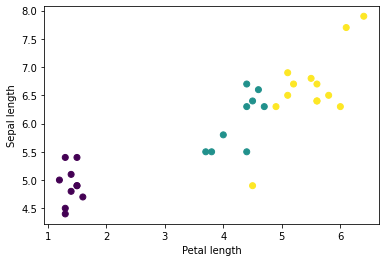

In [50]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

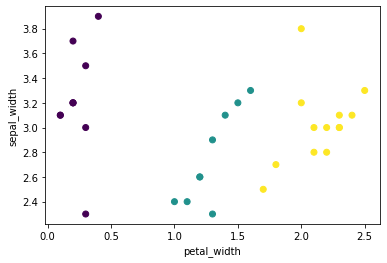

In [51]:
plt.scatter(features['petal_width'],
            features['sepal_width'],
            c=labels,
            cmap='viridis')

plt.xlabel("petal_width")
plt.ylabel("sepal_width")
plt.show()

In [53]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

Then use the `tf.data.Dataset#map` method to pack the `features` of each `(features,label)` pair into the training dataset:

In [54]:
train_dataset = train_dataset.map(pack_features_vector)

The features element of the `Dataset` are now arrays with shape `(batch_size, num_features)`. Let's look at the first few examples:

In [57]:
features, labels = next(iter(train_dataset))

print(features[:1])
print(features[:5])
print(features[:11])

tf.Tensor([[7.7 3.  6.1 2.3]], shape=(1, 4), dtype=float32)
tf.Tensor(
[[7.7 3.  6.1 2.3]
 [4.4 3.2 1.3 0.2]
 [6.5 3.  5.5 1.8]
 [6.4 2.8 5.6 2.2]
 [5.8 2.6 4.  1.2]], shape=(5, 4), dtype=float32)
tf.Tensor(
[[7.7 3.  6.1 2.3]
 [4.4 3.2 1.3 0.2]
 [6.5 3.  5.5 1.8]
 [6.4 2.8 5.6 2.2]
 [5.8 2.6 4.  1.2]
 [5.2 2.7 3.9 1.4]
 [4.7 3.2 1.6 0.2]
 [7.2 3.2 6.  1.8]
 [4.5 2.3 1.3 0.3]
 [6.2 3.4 5.4 2.3]
 [5.8 2.7 5.1 1.9]], shape=(11, 4), dtype=float32)


### Create a model using Keras

The `tf.keras.Sequential` model is a linear stack of layers. Its constructor takes a list of layer instances, in this case, two `tf.keras.layers.Dense` layers with 10 nodes each, and an output layer with 3 nodes representing our label predictions. The first layer's `input_shape` parameter corresponds to the number of features from the dataset, and is required:

In [59]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [60]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.9476457 , -1.5109464 ,  4.7873993 ],
       [-0.31504062, -0.23309755,  2.9571373 ],
       [ 0.7709454 , -1.4618626 ,  4.2805724 ],
       [ 0.80086786, -1.2225285 ,  4.101175  ],
       [ 0.5837224 , -1.4310063 ,  3.6798651 ]], dtype=float32)>

In [61]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.0210086 , 0.0017974 , 0.9771941 ],
       [0.03514432, 0.03814543, 0.92671025],
       [0.02894941, 0.00310416, 0.9679464 ],
       [0.03539426, 0.00467932, 0.9599264 ],
       [0.04301843, 0.00573679, 0.9512448 ]], dtype=float32)>

Taking the `tf.argmax` across classes gives us the predicted class index. But, the model hasn't been trained yet, so these aren't good predictions:

In [62]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
    Labels: [2 0 2 2 1 1 0 2 0 2 2 1 0 0 1 0 1 1 2 0 2 0 1 1 1 1 2 2 2 0 1 0]


### Define the loss and gradient function

Both training and evaluation stages need to calculate the model's *[loss](https://developers.google.com/machine-learning/crash-course/glossary#loss)*. This measures how off a model's predictions are from the desired label, in other words, how bad the model is performing. We want to minimize, or optimize, this value.

Our model will calculate its loss using the `tf.keras.losses.SparseCategoricalCrossentropy` function which takes the model's class probability predictions and the desired label, and returns the average loss across the examples.

In [63]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [65]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 2.9514575004577637


Use the `tf.GradientTape` context to calculate the *[gradients](https://developers.google.com/machine-learning/crash-course/glossary#gradient)* used to optimize your model:

In [66]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [67]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

We'll use this to calculate a single optimization step:

In [68]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 2.9514575004577637
Step: 1,         Loss: 2.490377902984619


In [69]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.021, Accuracy: 35.000%
Epoch 050: Loss: 0.492, Accuracy: 70.833%
Epoch 100: Loss: 0.303, Accuracy: 95.833%
Epoch 150: Loss: 0.193, Accuracy: 98.333%
Epoch 200: Loss: 0.138, Accuracy: 97.500%


### Visualize the loss function over time

While it's helpful to print out the model's training progress, it's often *more* helpful to see this progress. [TensorBoard](https://www.tensorflow.org/tensorboard) is a nice visualization tool that is packaged with TensorFlow, but we can create basic charts using the `matplotlib` module.

Interpreting these charts takes some experience, but you really want to see the *loss* go down and the *accuracy* go up:

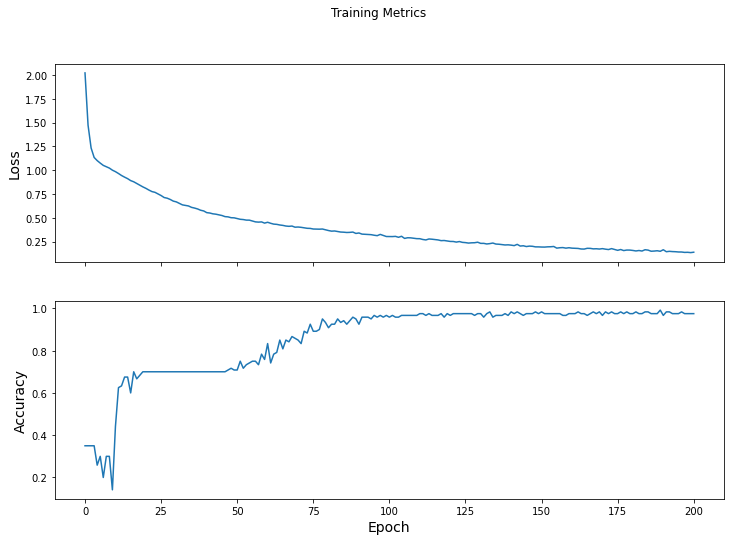

In [71]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

### Setup the test dataset

Evaluating the model is similar to training the model. The biggest difference is the examples come from a separate *[test set](https://developers.google.com/machine-learning/crash-course/glossary#test_set)* rather than the training set. To fairly assess a model's effectiveness, the examples used to evaluate a model must be different from the examples used to train the model.

The setup for the test `Dataset` is similar to the setup for training `Dataset`. Download the CSV text file and parse that values, then give it a little shuffle:

In [74]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"
test_dataset_fn = os.path.basename(test_url)

test_fp = tf.keras.utils.get_file(fname=test_dataset_fn,
                                    origin=test_url,
                                    cache_dir=DATASET_PATH,
                                    cache_subdir=TEST_DATASET_DIRNAME)

test_fp_safe = str(test_fp).replace(" ","\ ")

print("Local copy of the test dataset file: {}".format(test_fp))
print("Safe test path: {}".format(test_fp_safe))

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step
Local copy of the test dataset file: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_tests_datasets/datasets/test/iris_test.csv
Safe test path: /Users/zwerbllc/Library/Mobile\ Documents/com~apple~CloudDocs/Dev/tf_tests_datasets/datasets/test/iris_test.csv


In [75]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

### Evaluate the model on the test dataset

Unlike the training stage, the model only evaluates a single [epoch](https://developers.google.com/machine-learning/glossary/#epoch) of the test data. In the following code cell, we iterate over each example in the test set and compare the model's prediction against the actual label. This is used to measure the model's accuracy across the entire test set:

In [76]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


We can see on the last batch, for example, the model is usually correct:

In [77]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [79]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (97.3%)
Example 1 prediction: Iris versicolor (85.8%)
Example 2 prediction: Iris virginica (81.0%)


### Save Model

In [93]:
model_name = "test_model-" + time.strftime("%Y-%m-%d-%H%M%S")

model.save(os.path.join(MODELS_PATH,model_name))

INFO:tensorflow:Assets written to: /Users/zwerbllc/Library/Mobile Documents/com~apple~CloudDocs/Dev/tf_tests_datasets/models/test_model-2020-09-26-193045/assets


### Load Model

In [95]:
model_name = "test_model-" + "2020-09-26-193045"

new_model = keras.models.load_model(os.path.join(MODELS_PATH,model_name))


In [96]:
for (x, y) in test_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = new_model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%
